## Visualising Support vector machines
Dataset reference:  <strong>Iris</strong>

The dataset contains a set of 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.


In [1]:
import seaborn as sea
import matplotlib.pyplot as plt
iris = sea.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)

sea.pairplot(iris, hue="species",palette="bright")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### For sake of visualisation let's only deal with two columns

>  And convert categorical values to numerical target

In [2]:
df=iris[(iris['species']!='virginica')]
df=df.drop(['sepal_length','sepal_width'], axis=1)

df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
print(df.sample(5))


    petal_length  petal_width  species
37           1.4          0.1        0
34           1.5          0.2        0
20           1.7          0.2        0
1            1.4          0.2        0
5            1.7          0.4        0


### Split the X's and Y's for our machine.


In [3]:
X=df.iloc[:,0:2] 
y=df['species']
# help(plt.scatter)

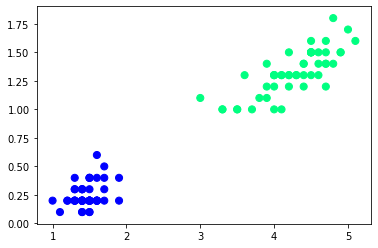

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='winter')

### SVM!! 

[[1.9 0.4]
 [3.  1.1]]


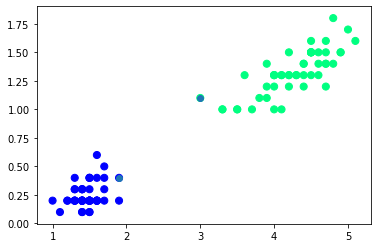

In [9]:
from sklearn.svm import SVC
import numpy as np
model = SVC(kernel='linear', C = 1E343)
model.fit(X,y)
print(model.support_vectors_)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='winter')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

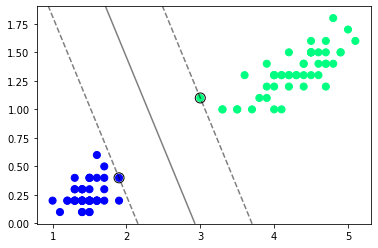

### Not linearly seperable data

Generating data from sklearn package

In [12]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
y1 = y[y==1]
y0 = y[y==0]

x0 = X[y==0]
x1 = X[y==1]
# x0

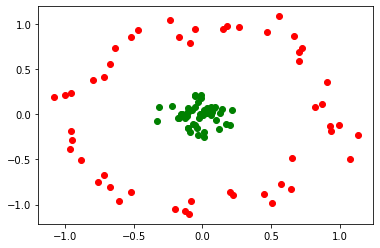

In [13]:
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], "go")
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [15]:
# In this scenario, a linear kernel  will
model=SVC(kernel='rbf').fit(X, y)
model.support_vectors_

/home/prithvi/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[-0.17162496,  0.85543618],
       [-0.71812443, -0.66902831],
       [-0.79618147,  0.37704695],
       [-0.51906116, -0.85984334],
       [ 0.70179148,  0.58654912],
       [-0.09053451,  0.79265458],
       [ 0.6497445 , -0.48867751],
       [-0.08565054, -0.95743039],
       [-0.71344789,  0.41585917],
       [-0.95473026, -0.18596924],
       [-0.67491661,  0.55285031],
       [ 0.86920062,  0.10912441],
       [ 0.22172524, -0.89698286],
       [ 0.82319327,  0.08258065],
       [ 0.20154241, -0.86417991],
       [ 0.01302379, -0.25128712],
       [-0.01011419,  0.21763341],
       [-0.02798637, -0.22951375],
       [ 0.1706886 , -0.10418012],
       [ 0.12141852, -0.15886539],
       [-0.00793596,  0.18541223],
       [-0.05524415,  0.2137817 ],
       [ 0.21917933,  0.04852382],
       [-0.22142623,  0.09374346],
       [-0.31215919,  0.08258314],
       [-0.05124828,  0.20685789],
       [-0.33076941, -0.07368459],
       [ 0.2047893 , -0.12350891]])

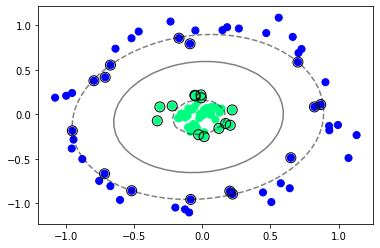

In [16]:
ax = plt.gca() #Get current axis

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()